In [1]:
import pandas as pd

df = pd.read_csv("ratings_small.csv")

df


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [2]:
import collaborative_filtering as cofi

index_col = 'userId'
columns_col = 'movieId'
values_col = 'rating'

df_pred, J_hist = cofi.fill_missed(df[[index_col, columns_col, values_col]], compute_average_for_blank_columns=False, n_features=20, max_iter=1000, return_J_hist=True)

# df_pred.to_csv('collaborative_filtering_results.csv')


index: userId, columns: movieId, values: rating


d:\VS Projects\17 task\Lesson 17 cofi\collaborative_filtering.py:146: FutureWarning: The provided callable <function max at 0x0000010AD358CC20> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_target=df.pivot_table(index=index, columns=columns, values=values, aggfunc=np.max, dropna= False)
d:\VS Projects\17 task\Lesson 17 cofi\collaborative_filtering.py:151: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)


Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 1000
50: 260706.3071250387
100: 236011.75353591057
150: 217796.48905970878
200: 201920.52417550108
250: 187913.2427786094
300: 175336.3200025694
350: 163853.40494810411
400: 153260.6321744366
450: 143460.90397275126
500: 134422.44954956064
550: 126142.6041088393
600: 118623.48905600268
650: 111857.53804286395
700: 105818.3923319173
750: 100456.77046117408
800: 95703.7535899987
850: 91480.49884832083
900: 87709.15140486718
950: 84320.35306577999
1000: 81256.23692875347
iter_number> max_iter


In [3]:
print(df_pred.head(100))

    userId  movieId  rating  rating_pred_round  rating_pred
0        1        1     NaN                3.0     3.184368
1        2        1     NaN                3.5     3.385681
2        3        1     NaN                3.0     3.089380
3        4        1     NaN                4.5     4.485556
4        5        1     NaN                4.0     3.910028
..     ...      ...     ...                ...          ...
95      96        1     NaN                4.5     4.721223
96      97        1     1.0                2.5     2.626318
97      98        1     NaN                5.0     4.781066
98      99        1     4.0                4.0     4.173616
99     100        1     4.0                3.5     3.565031

[100 rows x 5 columns]


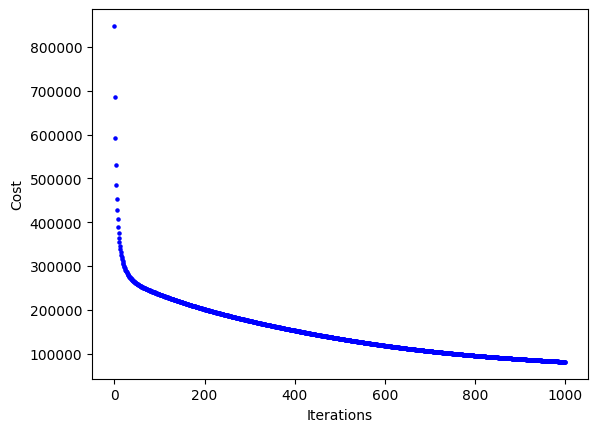

In [4]:
cofi.draw_cost_changes(J_hist)

In [12]:
df_pred

,userId,movieId,rating,rating_pred_round,rating_pred
0,1,1,NaN,3.0,3.184368
1,2,1,NaN,3.5,3.385681
2,3,1,NaN,3.0,3.089380
3,4,1,NaN,4.5,4.485556
4,5,1,NaN,4.0,3.910028
...,...,...,...,...,...
6083281,667,163949,NaN,2.0,2.197071
6083282,668,163949,NaN,4.5,4.682593
6083283,669,163949,NaN,4.0,3.920571
6083284,670,163949,NaN,2.5,2.537134


In [13]:
result = df_pred[df_pred['rating'].notna()]
result

,userId,movieId,rating,rating_pred_round,rating_pred
6,7,1,3.0,3.0,3.217970
8,9,1,4.0,4.0,3.839241
12,13,1,5.0,4.0,4.221274
14,15,1,2.0,2.5,2.540834
18,19,1,3.0,4.0,3.932471
...,...,...,...,...,...
6080217,287,161944,5.0,4.5,4.645272
6080674,73,162376,4.5,4.5,4.268414
6081883,611,162542,5.0,5.0,4.980903
6082554,611,162672,3.0,3.0,2.862896


In [14]:
result.to_csv('collaborative_filtering_results.csv')